### Customizing Matplotlib: Configurations and Stylesheets

• Matplotlib’s default plot settings are often the subject of complaint among its users.

• While much is slated to change in the 2.0 Matplotlib release, the ability to customize default settings helps bring the package in line with your own aesthetic preferences.

• Here we’ll walk through some of Matplotlib’s runtime configuration ( rc ) options, and take a look at the newer stylesheets feature, which contains some nice sets of default configurations.

### Plot Customization by Hand

• Throughout this chapter, we’ve seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.

• It’s possible to do these customizations for each individual plot.

• For example, here is a fairly drab default histogram.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("classic")

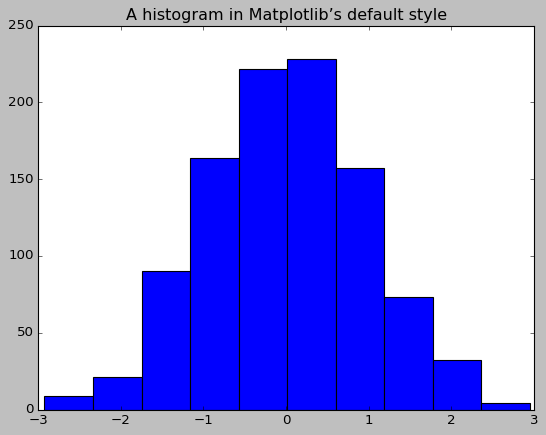

In [10]:
x = np.random.randn(1000)
plt.hist(x)
plt.title("A histogram in Matplotlib’s default style");

• We can adjust this by hand to make it a much more visually pleasing plot

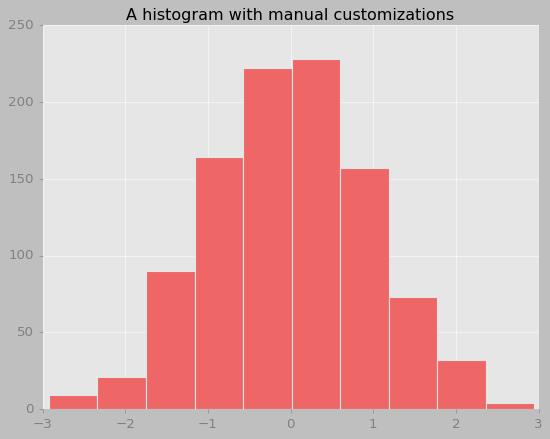

In [11]:
# Use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Draw a solid white grid lines
plt.grid(color = 'w', linestyle = "solid")

# Hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Hide top & right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Lighten ticks & labels
ax.tick_params(colors = "gray", direction = "out")
for tick in ax.get_xticklabels():
    tick.set_color("gray")
for tick in ax.get_yticklabels():
    tick.set_color("gray")

# Control face & edge color of histogram
ax.hist(x, edgecolor = "#E6E6E6", color='#EE6666')
plt.title("A histogram with manual customizations");

• This looks better, and you may recognize the look as inspired by the look of the R
language’s ggplot visualization package.

• But this took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot.

• Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

### Changing the Defaults: rcParams

• Each time Matplotlib loads, it defines a runtime configuration(rc) containing the default styles for every plot element you create.

• You can adjust this configuration at any time using the plt.rc convenience routine.

• Let’s see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

• We’ll start by saving a copy of the current rcParams dictionary, so we can easily reset these changes in the current session:

In [12]:
ipython_default = plt.rcParamsDefault.copy()

In [13]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color = 'w', linestyle = 'solid')
plt.rc('xtick', direction = 'out', color = 'gray')
plt.rc('ytick', direction = 'out', color = 'gray')
plt.rc('patch', edgecolor = '#E6E6E6')
plt.rc('lines', linewidth = 2)

• With these settings defined, we can now create a plot and see our settings in action

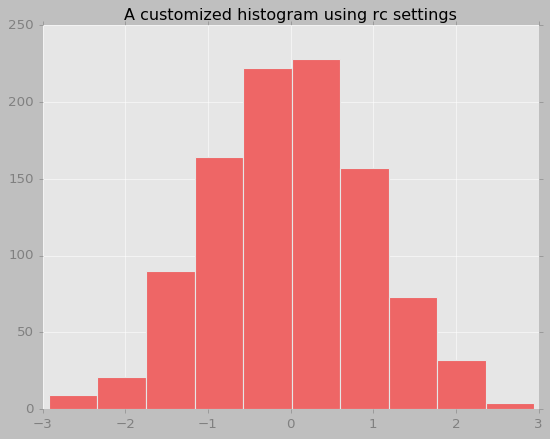

In [15]:
plt.title("A customized histogram using rc settings")
plt.hist(x);

• Let’s see what simple line plots look like with these rc parameters

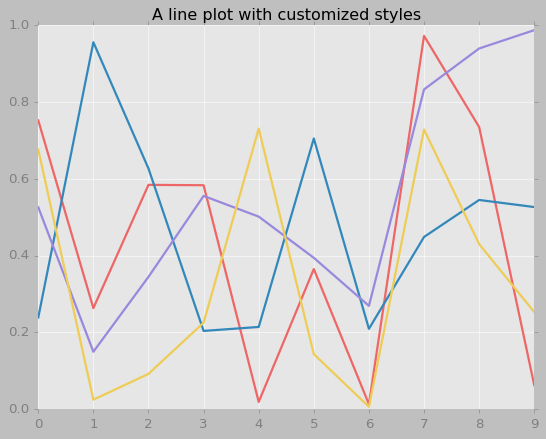

In [16]:
plt.title("A line plot with customized styles")
for i in range(4):
    plt.plot(np.random.rand(10))